**Data quality checks**

Data Exploration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import os
from collections import Counter
import glob

The following code loads a HSI file and its mask from the data

In [2]:
# define the paths to the files
hsi_path = 'C:\\Users\\LENOVO\\Desktop\\iskola stuff\\mester stuff\\Master Thesis\\Data\\HDF5_FILES\\07SEPT2023\\FX10\\FX10_07SEPT2023_1A1.hdf5' # these files contain the hyperspectral image and its wavelengths (in nm)
mask_path = 'C:\\Users\\LENOVO\\Desktop\\iskola stuff\\mester stuff\\Master Thesis\\Data\\MASKS\\FX10/FX10_07SEPT2023_1A1.png' # this is a ground truth mask denoting background (0) leaf (1) and stem (2)

In [3]:
# the following functions, contained in utils.py, load the hsi and mask as np arrays
hsi_np, wlens = LoadHSI(hsi_path, return_wlens=True)
mask_np = read_mask(mask_path)

print(f'lowest band at {np.min(wlens)}nm, highest at {np.max(wlens)}nm')

lowest band at 398.75nm, highest at 1001.86nm


As we can see from the following code, the HSI has 224 wavelengths

In [4]:
len(wlens)

224

As a Data Quality check, I want to confirm the following things:
- All of the HSIs have the same amount of wavelengths that are taken with the same camera (FX10 or FX17)
- If they all have the same number wavelengths, are those wavelengths all the same (fors HSIs taaken with the same camera)? (They should be!)


First I look at the HSI (hdf5) files taken with the FX10 camera. I take all the file(name)s from the FX10 folders and iterate through them to answer the questions above

In [5]:
# Specify the parent directory where the search begins
parent_directory = 'C:\\Users\\LENOVO\\Desktop\\iskola stuff\\mester stuff\\Master Thesis\\Data\\HDF5_FILES'

# Use glob to find all .hdf5 files specifically in the FX10 folders
fx10_HSI = glob.glob(f'{parent_directory}/*/FX10/*.hdf5', recursive=True)

print(f'Number of HSIs taken with the FX10 camera: {len(fx10_HSI)}')

Number of HSIs taken with the FX10 camera: 428


In [6]:
# CODE RUNS FOR ~20MINS

# Create a dictionary with the HSI filename as keys
# and a tuple of number of wavelengths & if the actual wavelengths are the same as the prevous image's as values
hsi_wavelengths_fx10 = {}
prev_wlens = []
for hsi in fx10_HSI:
    hsi_np, wlens = LoadHSI(hsi, return_wlens=True)
    
    # Iteratively check if current wlens are the same as the previous HSI's wlens - hopefully we will see all True at the end
    if hsi == fx10_HSI[0]:
        equal_wlens = True
    else:
        equal_wlens = np.array_equal(wlens, prev_wlens)
    prev_wlens = wlens
    
    hsi_id = os.path.splitext(os.path.basename(hsi))[0]
    print(hsi_id)
    hsi_wavelengths_fx10[hsi_id] = (len(wlens), equal_wlens)

FX10_07SEPT2023_1A1
FX10_07SEPT2023_1A2
FX10_07SEPT2023_1A3
FX10_07SEPT2023_1A4
FX10_07SEPT2023_1A5
FX10_07SEPT2023_1B1
FX10_07SEPT2023_1B2
FX10_07SEPT2023_1B3
FX10_07SEPT2023_1B4
FX10_07SEPT2023_1B5
FX10_07SEPT2023_2A1
FX10_07SEPT2023_2A2
FX10_07SEPT2023_2A3
FX10_07SEPT2023_2A4
FX10_07SEPT2023_2A5
FX10_07SEPT2023_2B1
FX10_07SEPT2023_2B2
FX10_07SEPT2023_2B4
FX10_07SEPT2023_3C1
FX10_07SEPT2023_3C2
FX10_07SEPT2023_3C3
FX10_07SEPT2023_3C4
FX10_07SEPT2023_3C5
FX10_07SEPT2023_3D1
FX10_07SEPT2023_3D2
FX10_07SEPT2023_3D3
FX10_07SEPT2023_3D4
FX10_07SEPT2023_3D5
FX10_07SEPT2023_4C1
FX10_07SEPT2023_4C3
FX10_07SEPT2023_4C5
FX10_07SEPT2023_4D1
FX10_07SEPT2023_4D2
FX10_07SEPT2023_4D3
FX10_07SEPT2023_4D4
FX10_07SEPT2023_4D5
FX10_08SEPT2023_1A1
FX10_08SEPT2023_1A2
FX10_08SEPT2023_1A3
FX10_08SEPT2023_1A4
FX10_08SEPT2023_1A5
FX10_08SEPT2023_1B1
FX10_08SEPT2023_1B2
FX10_08SEPT2023_1B3
FX10_08SEPT2023_1B4
FX10_08SEPT2023_1B5
FX10_08SEPT2023_2A1
FX10_08SEPT2023_2A2
FX10_08SEPT2023_2A3
FX10_08SEPT2023_2A4


In [7]:
# Count the occurrences of each unique value
value_counts_fx10 = Counter(hsi_wavelengths_fx10.values())

for value, count in value_counts_fx10.items():
    print(f"Value: {value}, Count: {count}")

Value: (224, True), Count: 428


The code above confirms that all HSI files in the FX10 folders have 224 wavelengths, and all of those wavelengths are the same

Now I look at the HSI (hdf5) files taken with the FX17 camera. I take all the file(name)s from the FX17 folders and iterate through them to answer the questions above

In [6]:
# Use glob to find all .hdf5 files specifically in the FX17 folders
fx17_HSI = glob.glob(f'{parent_directory}/*/FX17/*.hdf5', recursive=True)

print(f'Number of HSIs taken with the FX17 camera: {len(fx17_HSI)}')

Number of HSIs taken with the FX17 camera: 428


In [29]:
# CODE RUNS FOR ~20MINS

# Create a dictionary with the HSI filename as keys
# and a tuple of number of wavelengths & if the actual wavelengths are the same as the prevous image's as values
hsi_wavelengths_fx17 = {}
prev_wlens = []
for hsi in fx17_HSI:
    hsi_np, wlens = LoadHSI(hsi, return_wlens=True)
    
    # Iteratively check if current wlens are the same as the previous HSI's wlens - hopefully we will see all True at the end
    if hsi == fx17_HSI[0]:
        equal_wlens = True
    else:
        equal_wlens = np.array_equal(wlens, prev_wlens)
    prev_wlens = wlens
    
    hsi_id = os.path.splitext(os.path.basename(hsi))[0]
    print(hsi_id)
    hsi_wavelengths_fx17[hsi_id] = (len(wlens), equal_wlens)

FX17_07SEPT2023_1A1
FX17_07SEPT2023_1A2
FX17_07SEPT2023_1A3
FX17_07SEPT2023_1A4
FX17_07SEPT2023_1A5
FX17_07SEPT2023_1B1
FX17_07SEPT2023_1B2
FX17_07SEPT2023_1B3
FX17_07SEPT2023_1B4
FX17_07SEPT2023_1B5
FX17_07SEPT2023_2A1
FX17_07SEPT2023_2A2
FX17_07SEPT2023_2A3
FX17_07SEPT2023_2A4
FX17_07SEPT2023_2A5
FX17_07SEPT2023_2B1
FX17_07SEPT2023_2B2
FX17_07SEPT2023_2B4
FX17_07SEPT2023_3C1
FX17_07SEPT2023_3C2
FX17_07SEPT2023_3C3
FX17_07SEPT2023_3C4
FX17_07SEPT2023_3C5
FX17_07SEPT2023_3D1
FX17_07SEPT2023_3D2
FX17_07SEPT2023_3D3
FX17_07SEPT2023_3D4
FX17_07SEPT2023_3D5
FX17_07SEPT2023_4C1
FX17_07SEPT2023_4C3
FX17_07SEPT2023_4C5
FX17_07SEPT2023_4D1
FX17_07SEPT2023_4D2
FX17_07SEPT2023_4D3
FX17_07SEPT2023_4D4
FX17_07SEPT2023_4D5
FX17_08SEPT2023_1A1
FX17_08SEPT2023_1A2
FX17_08SEPT2023_1A3
FX17_08SEPT2023_1A4
FX17_08SEPT2023_1A5
FX17_08SEPT2023_1B1
FX17_08SEPT2023_1B2
FX17_08SEPT2023_1B3
FX17_08SEPT2023_1B4
FX17_08SEPT2023_1B5
FX17_08SEPT2023_2A1
FX17_08SEPT2023_2A2
FX17_08SEPT2023_2A3
FX17_08SEPT2023_2A4


In [30]:
# Count the occurrences of each unique value
value_counts_fx17 = Counter(hsi_wavelengths_fx17.values())

for value, count in value_counts_fx17.items():
    print(f"Value: {value}, Count: {count}")

Value: (224, True), Count: 428


The code above confirms that all HSI files in the FX10 folders have 224 wavelengths, and all of those wavelengths are the same

Out of curiosity - both the fx10 and fx17 camera make 224 spectral images. This 224 should be different though, but let's check it. Since we know that every fx10 HSI have the same wavelengths and every fx17 HSI also have the same wavelengths, we can just take 1-1 HSIs from both camera and compare the wavelengths of those

In [8]:
fx10_example_HSI = 'C:\\Users\\LENOVO\\Desktop\\iskola stuff\\mester stuff\\Master Thesis\\Data\\HDF5_FILES\\07SEPT2023\\FX10\\FX10_07SEPT2023_1A1.hdf5'
fx17_example_HSI = 'C:\\Users\\LENOVO\\Desktop\\iskola stuff\\mester stuff\\Master Thesis\\Data\\HDF5_FILES\\07SEPT2023\\FX17\\FX17_07SEPT2023_1A1.hdf5'

In [9]:
hsi_np_fx10, wlens_fx10 = LoadHSI(fx10_example_HSI, return_wlens=True)
hsi_np_fx17, wlens_fx17 = LoadHSI(fx17_example_HSI, return_wlens=True)
print(f'FX10 example HSI - lowest band at {np.min(wlens_fx10)}nm, highest at {np.max(wlens_fx10)}nm')
print(f'FX17 example HSI - lowest band at {np.min(wlens_fx17)}nm, highest at {np.max(wlens_fx17)}nm')

FX10 example HSI - lowest band at 398.75nm, highest at 1001.86nm
FX17 example HSI - lowest band at 935.61nm, highest at 1720.23nm


In [10]:
# Look at the first few wlens of both cameras
print(wlens_fx10[0:5])
print(wlens_fx17[0:5])

np.array_equal(wlens_fx10, wlens_fx17)

[398.75 401.3  403.84 406.39 408.94]
[935.61 939.06 942.52 945.98 949.43]


False

In [11]:
# Nr. of wavelengths by both camera - interestingly they are the same
print(len(wlens_fx10))
print(len(wlens_fx17))

224
224


Clearly the wlens of the two cameras are different, but we see an intersection of bands between 935.61nm and 1001.86nm where both cameras captured pictures. This raises the question if there are any wavelengths (even just 1 or 2) that are the same for the two cameras?

The code below check this and we see that no wavelengths are the same

In [12]:
set(np.isin(wlens_fx10, wlens_fx17))

{np.False_}

Another interesting thing - The HS Images have different shape!! Is this not a problem? We saw previously that the spectral dimensions are the same, but the spatial dimensions (x,y axes/number of pixels) are different!! They are not only different for the different pictures taken by the same camera but also for the same picture taken with the different camera! (see below)

In [13]:
# Shape of a few images from the FX10 camera
for hsi in fx10_HSI[0:5]:
    hsi_np, wlens = LoadHSI(hsi, return_wlens=True)
    print(os.path.splitext(os.path.basename(hsi))[0], hsi_np.shape)

FX10_07SEPT2023_1A1 (224, 1024, 858)
FX10_07SEPT2023_1A2 (224, 993, 1582)
FX10_07SEPT2023_1A3 (224, 641, 1228)
FX10_07SEPT2023_1A4 (224, 670, 758)
FX10_07SEPT2023_1A5 (224, 743, 1330)


In [23]:
# Shape of the same images from the FX17 camera
for hsi in fx17_HSI[0:5]:
    hsi_np, wlens = LoadHSI(hsi, return_wlens=True)
    print(os.path.splitext(os.path.basename(hsi))[0], hsi_np.shape)

FX17_07SEPT2023_1A1 (224, 640, 613)
FX17_07SEPT2023_1A2 (224, 640, 1140)
FX17_07SEPT2023_1A3 (224, 501, 1129)
FX17_07SEPT2023_1A4 (224, 506, 866)
FX17_07SEPT2023_1A5 (224, 490, 948)


It's weird that the same leave with different camera has different shape (spatial dimensions to be exact). So let's plot the same image with the different cameras below eachother. For the FX10 we will be able to plot pseudo-RGB images because it captures information from the RGB wavelengths but this won't be possible for the FX17 camera. Nevertheless, something can be plotted for FX17 as well, it just won't be RGB, we're interested in the shapes (spatial dimensions) of the pictures now anyway.

In [14]:
# Load masks
fx10_example_mask = 'C:\\Users\\LENOVO\\Desktop\\iskola stuff\\mester stuff\\Master Thesis\\Data\\MASKS\\FX10\\FX10_07SEPT2023_1A1.png'
mask_np_fx10 = read_mask(fx10_example_mask)

fx17_example_mask = 'C:\\Users\\LENOVO\\Desktop\\iskola stuff\\mester stuff\\Master Thesis\\Data\\MASKS\\FX17\\FX17_07SEPT2023_1A1.png'
mask_np_fx17 = read_mask(fx17_example_mask)

RGB indices in hsi -> [18 52 67]
shape, (3, 1024, 858), but for other libraries usually the bands is the last dimension, so we change the order and get:
(1024, 858, 3)
shape, (3, 640, 613), but for other libraries usually the bands is the last dimension, so we change the order and get:
(640, 613, 3)


Text(0.5, 1.0, 'Mask')

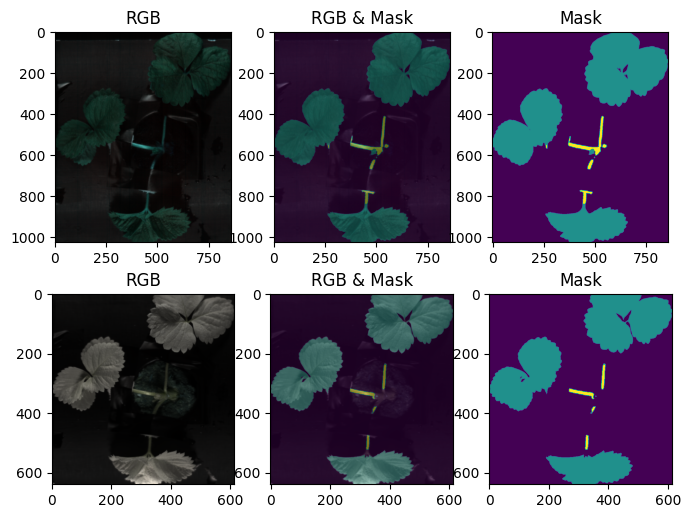

In [15]:
# we find the bands corresponding to the RGB channels
RGB_wlens = (445, 535, 575)
RGB_bands = np.argmin(np.abs(np.array(wlens_fx10)[:, np.newaxis] - RGB_wlens), axis=0)
print(f'RGB indices in hsi -> {RGB_bands}')

# we create and RGB image from the hsi by selecting those bands, 
# but first set all negative values to 0 (these are noise) and normalize the hsi
hsi_np_fx10 = np.maximum(hsi_np_fx10, 0)
hsi_np_fx10 = hsi_np_fx10  / np.max(hsi_np_fx10)

# select the rgb bands
rgb_img_fx10 = hsi_np_fx10[RGB_bands,:,]
print(f'shape, {rgb_img_fx10.shape}, but for other libraries usually the bands is the last dimension, so we change the order and get:')

rgb_img_fx10 = rgb_img_fx10.transpose((1,2,0))
print(rgb_img_fx10.shape)


# we create and RGB image from the hsi by selecting those bands, 
# but first set all negative values to 0 (these are noise) and normalize the hsi
hsi_np_fx17 = np.maximum(hsi_np_fx17, 0)
hsi_np_fx17 = hsi_np_fx17  / np.max(hsi_np_fx17)

# select the rgb bands
rgb_img_fx17 = hsi_np_fx17[RGB_bands,:,]
print(f'shape, {rgb_img_fx17.shape}, but for other libraries usually the bands is the last dimension, so we change the order and get:')

rgb_img_fx17 = rgb_img_fx17.transpose((1,2,0))
print(rgb_img_fx17.shape)


#  now we can visualize the image
plt.figure(figsize = (8,6))
plt.subplot(2,3,1)
plt.imshow(rgb_img_fx10)
plt.title('RGB')

plt.subplot(2,3,2)
plt.imshow(rgb_img_fx10)
plt.imshow(mask_np_fx10, alpha=0.4)
plt.title('RGB & Mask')

plt.subplot(2,3,3)
plt.imshow(mask_np_fx10)
plt.title('Mask')

plt.subplot(2,3,4)
plt.imshow(rgb_img_fx17)
plt.title('RGB')

plt.subplot(2,3,5)
plt.imshow(rgb_img_fx17)
plt.imshow(mask_np_fx17, alpha=0.4)
plt.title('RGB & Mask')

plt.subplot(2,3,6)
plt.imshow(mask_np_fx17)
plt.title('Mask')

Now I check if the mask files are all 2-dimensional (len(mask.shape == 2)) and if their unique values are 0/1/2. 0 is black, 1 is green and 2 is yellow mask "background"

In [25]:
# This is a black pixel in the mask
print(mask_np_fx10[:, :][0, 0])
# This is a green pixel in the mask
print(mask_np_fx10[:, :][200, 500])
# This is a yellow pixel in the mask
print(mask_np_fx10[:, :][450, 530])

0.0
1.0
2.0


Masks in FX10 folder

In [45]:
# Specify the parent directory where the search begins
parent_directory_mask = 'C:\\Users\\LENOVO\\Desktop\\iskola stuff\\mester stuff\\Master Thesis\\Data\\MASKS'

# Use glob to find all .hdf5 files specifically in the FX10 folders
fx10_mask = glob.glob(f'{parent_directory_mask}/FX10/*.png', recursive=True)

print(f'Number of masks in the FX10 folder (should be 428 i.e. same as nr. of HSIs): {len(fx10_mask)}')

Number of masks in the FX10 folder (should be 428 i.e. same as nr. of HSIs): 412


Problem - there are fewer FX10 masks than HSI images

In [65]:
# Create a dictionary with the mask filename as keys
masks_fx10 = {}
for mask in fx10_mask:
    mask_np = read_mask(mask)
    
    # Get mask name (id)
    mask_id = os.path.splitext(os.path.basename(mask))[0]
    print(mask_id)

    # Update dictionary
    masks_fx10[mask_id] = (len(mask_np.shape), len(np.unique(mask_np).tolist()),
                           np.unique(mask_np).tolist()[0], np.unique(mask_np).tolist()[1], np.unique(mask_np).tolist()[-1])

FX10_07SEPT2023_1A1
FX10_07SEPT2023_1A2
FX10_07SEPT2023_1A3
FX10_07SEPT2023_1A4
FX10_07SEPT2023_1A5
FX10_07SEPT2023_1B1
FX10_07SEPT2023_1B2
FX10_07SEPT2023_1B3
FX10_07SEPT2023_1B4
FX10_07SEPT2023_1B5
FX10_07SEPT2023_2A1
FX10_07SEPT2023_2A2
FX10_07SEPT2023_2A3
FX10_07SEPT2023_2A4
FX10_07SEPT2023_2A5
FX10_07SEPT2023_2B1
FX10_07SEPT2023_2B2
FX10_07SEPT2023_2B4
FX10_07SEPT2023_3C1
FX10_07SEPT2023_3C2
FX10_07SEPT2023_3C3
FX10_07SEPT2023_3C4
FX10_07SEPT2023_3C5
FX10_07SEPT2023_3D1
FX10_07SEPT2023_3D2
FX10_07SEPT2023_3D3
FX10_07SEPT2023_3D4
FX10_07SEPT2023_3D5
FX10_07SEPT2023_4C1
FX10_07SEPT2023_4C3
FX10_07SEPT2023_4C5
FX10_07SEPT2023_4D1
FX10_07SEPT2023_4D2
FX10_07SEPT2023_4D3
FX10_07SEPT2023_4D4
FX10_07SEPT2023_4D5
FX10_08SEPT2023_1A1
FX10_08SEPT2023_1A2
FX10_08SEPT2023_1A3
FX10_08SEPT2023_1A4
FX10_08SEPT2023_1A5
FX10_08SEPT2023_1B1
FX10_08SEPT2023_1B2
FX10_08SEPT2023_1B3
FX10_08SEPT2023_1B4
FX10_08SEPT2023_1B5
FX10_08SEPT2023_2A1
FX10_08SEPT2023_2A2
FX10_08SEPT2023_2A3
FX10_08SEPT2023_2A4


In [67]:
# Count the occurrences of each unique value
value_counts_masks_fx10 = Counter(masks_fx10.values())

for value, count in value_counts_masks_fx10.items():
    print(f"Value: {value}, Count: {count}")

Value: (2, 3, 0.0, 1.0, 2.0), Count: 397
Value: (2, 2, 0.0, 1.0, 1.0), Count: 15


Masks in FX17 folder

In [68]:
# Use glob to find all .hdf5 files specifically in the FX17 folders
fx17_mask = glob.glob(f'{parent_directory_mask}/FX17/*.png', recursive=True)

print(f'Number of masks in the FX17 folder (should be 428 i.e. same as nr. of HSIs): {len(fx17_mask)}')

Number of masks in the FX17 folder (should be 428 i.e. same as nr. of HSIs): 428


In [69]:
# Create a dictionary with the mask filename as keys
masks_fx17 = {}
for mask in fx17_mask:
    mask_np = read_mask(mask)
    
    # Get mask name (id)
    mask_id = os.path.splitext(os.path.basename(mask))[0]
    print(mask_id)

    # Update dictionary
    masks_fx17[mask_id] = (len(mask_np.shape), len(np.unique(mask_np).tolist()),
                           np.unique(mask_np).tolist()[0], np.unique(mask_np).tolist()[1], np.unique(mask_np).tolist()[-1])

FX17_07SEPT2023_1A1
FX17_07SEPT2023_1A2
FX17_07SEPT2023_1A3
FX17_07SEPT2023_1A4
FX17_07SEPT2023_1A5
FX17_07SEPT2023_1B1
FX17_07SEPT2023_1B2
FX17_07SEPT2023_1B3
FX17_07SEPT2023_1B4
FX17_07SEPT2023_1B5
FX17_07SEPT2023_2A1
FX17_07SEPT2023_2A2
FX17_07SEPT2023_2A3
FX17_07SEPT2023_2A4
FX17_07SEPT2023_2A5
FX17_07SEPT2023_2B1
FX17_07SEPT2023_2B2
FX17_07SEPT2023_2B4
FX17_07SEPT2023_3C1
FX17_07SEPT2023_3C2
FX17_07SEPT2023_3C3
FX17_07SEPT2023_3C4
FX17_07SEPT2023_3C5
FX17_07SEPT2023_3D1
FX17_07SEPT2023_3D2
FX17_07SEPT2023_3D3
FX17_07SEPT2023_3D4
FX17_07SEPT2023_3D5
FX17_07SEPT2023_4C1
FX17_07SEPT2023_4C3
FX17_07SEPT2023_4C5
FX17_07SEPT2023_4D1
FX17_07SEPT2023_4D2
FX17_07SEPT2023_4D3
FX17_07SEPT2023_4D4
FX17_07SEPT2023_4D5
FX17_08SEPT2023_1A1
FX17_08SEPT2023_1A2
FX17_08SEPT2023_1A3
FX17_08SEPT2023_1A4
FX17_08SEPT2023_1A5
FX17_08SEPT2023_1B1
FX17_08SEPT2023_1B2
FX17_08SEPT2023_1B3
FX17_08SEPT2023_1B4
FX17_08SEPT2023_1B5
FX17_08SEPT2023_2A1
FX17_08SEPT2023_2A2
FX17_08SEPT2023_2A3
FX17_08SEPT2023_2A4


In [70]:
# Count the occurrences of each unique value
value_counts_masks_fx10 = Counter(masks_fx10.values())

for value, count in value_counts_masks_fx10.items():
    print(f"Value: {value}, Count: {count}")

Value: (2, 3, 0.0, 1.0, 2.0), Count: 397
Value: (2, 2, 0.0, 1.0, 1.0), Count: 15


**Todo:** 
- Check if mask shape for an image is the same as the HDF5 image spatial dimensions shape (so the shape except for the wavelengths). Iterate through all images like this
- Check which HSIs doesn't have a mask (iteratively)
- Check which images' mask have only two values. Plot a few of those images